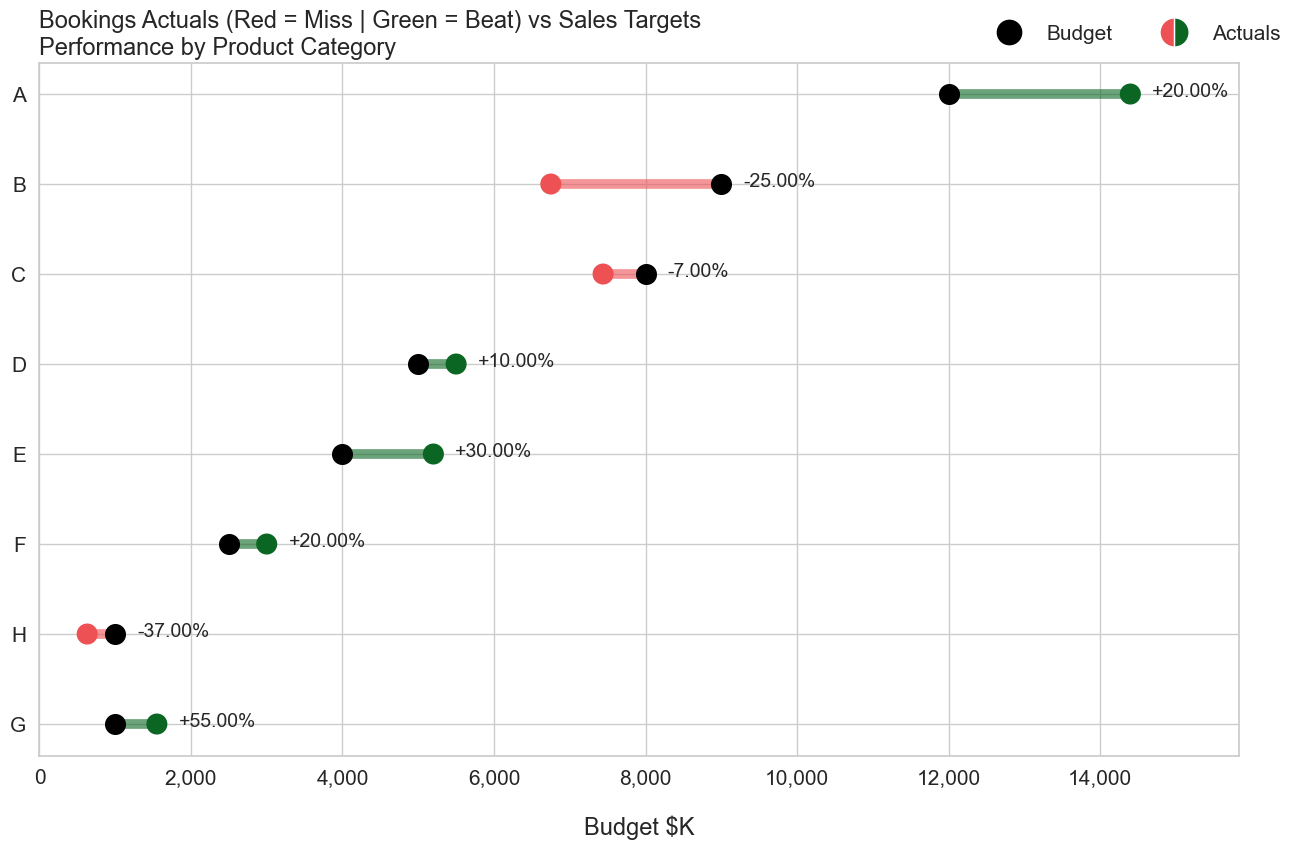

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.ticker import FuncFormatter
from matplotlib.legend_handler import HandlerBase
import seaborn as sns
import pandas as pd

dir = "C:\\Users\\Corey\\"
doc_dir = "C:\\Users\\Corey\\coreyrastello\\docs\\"

data = {
    "Budget": [12000000, 9000000, 8000000, 5000000, 4000000, 2500000, 1000000, 1000000],
    "Actuals": [14400000, 6750000, 7440000, 5500000, 5200000, 3000000, 1550000, 630000],
    "Product": ["A", "B", "C", "D", "E", "F", "G", "H"]
}

# Create the DataFrame
df = pd.DataFrame(data)
df['Beat/Miss'] = (df['Actuals']/df['Budget'])-1
df['Budget'] = df['Budget']/1000
df['Actuals'] = df['Actuals']/1000
df = df.set_index("Product").sort_values("Budget")
rowoffset = max(df['Actuals'].max(),df['Budget'].max())*.02

# Set style
sns.set(style="whitegrid")

# Create figure and axes
f, ax = plt.subplots(figsize = (16,9))

# Plotting
y_range = np.arange(1, len(df.index) + 1)
colors = np.where(df['Actuals'] > df['Budget'], '#0B6623', '#ed5153')
plt.hlines(y=y_range, xmin=df['Budget'], xmax=df['Actuals'], color=colors, alpha=0.6, lw=7)
plt.scatter(df['Actuals'], y_range, color=colors, s=200, zorder=3)
plt.scatter(df['Budget'], y_range, color='#000000', s=200, zorder=3)

# Annotation
for (_, row), y in zip(df.iterrows(), y_range):
    plt.annotate(f"{row['Beat/Miss']:+.2%}", (max(row['Actuals'], row['Budget']) + rowoffset, y - 0.03), fontsize='14')

# Custom legend handler for "Amount"
class HalfColorDotHandler(HandlerBase):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        r = 1 * height
        center = (xdescent + width / 2, ydescent + height / 2)
        left_half = mpatches.Wedge(center, r, 90, 270, facecolor='#ed5153', transform=trans)
        right_half = mpatches.Wedge(center, r, 270, 90, facecolor='#0B6623', transform=trans)
        return [left_half, right_half]

purple_triangle = mlines.Line2D([], [], color='purple', marker='^', linestyle='None',
                          markersize=10, label='Purple triangles')

# Setting up legend
Amount_patch = "Test"
Budget_patch = mlines.Line2D([], [], color='black', marker='.', linestyle='None',
                          markersize=35)
plt.legend([Budget_patch, Amount_patch], ['Budget', 'Actuals'], handler_map={Amount_patch: HalfColorDotHandler()},
           bbox_to_anchor=(1.05, 1), loc='lower right', frameon = False, ncol = 2, fontsize=15)

# Set ticks and labels
ax.tick_params(axis='both', which='major', labelsize=15)
plt.yticks(y_range, df.index)
plt.title("Bookings Actuals (Red = Miss | Green = Beat) vs Sales Targets\nPerformance by Product Category", loc='left', fontsize='17')
plt.xlim(0, max(df['Actuals'].max(),df['Budget'].max()) + rowoffset*5)
plt.gcf().subplots_adjust(left=0.15)
plt.xlabel('Budget $K', fontsize=17, labelpad=20)

# Format x-axis ticks with commas
def format_with_commas(x, _):
    return f"{x:,.0f}"

ax.xaxis.set_major_formatter(FuncFormatter(format_with_commas))

plt.savefig("ActualsVsBudget.png", dpi=300, bbox_inches='tight')
plt.savefig(rf"{doc_dir}ActualsVsBudget.png", dpi=300, bbox_inches='tight')

# Show plot
plt.show()